# **Post Sentiment Classification**

Loading the data

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

In [2]:
train_data.head()

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7f317,https://www.reddit.com/r/relationships/comment...,Melodrama_,"It's a sad realization, isn't it?",,False,2,t1_cy7erc5,negative,1.000000
1,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hlyf,https://www.reddit.com/r/relationships/comment...,Melodrama_,I told her a couple of minutes ago that I didn...,elaboration,False,2,t1_cy7erc5,neutral,0.483631
2,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7etrr,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Leeches don't make good friends.,answer,False,1,t3_3xshx9,positive,0.600000
3,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hhpq,https://www.reddit.com/r/relationships/comment...,Melodrama_,I just ended it. Apparently she wasn't a good ...,elaboration,False,2,t1_cy7etrr,positive,0.475000
4,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7q0qg,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Good for you! Make sure you stick with it.,appreciation,False,3,t1_cy7hhpq,positive,0.744444


AxesSubplot(0.125,0.125;0.775x0.755)


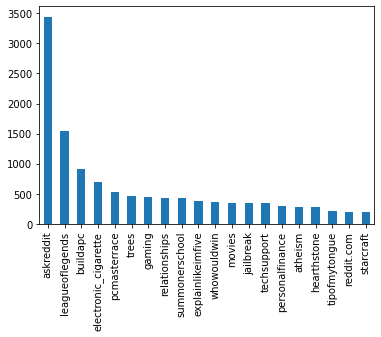

In [3]:
subreddits = train_data['subreddit']
subreddit_counts = subreddits.value_counts()
top_subbreddits = subreddit_counts.nlargest(20).plot.bar()
print(top_subbreddits)

In [4]:
train_data.describe()

,post_depth,sentiment.subjectivity
count,12138.000000,12138.000000
mean,1.785467,0.382116
std,1.501129,0.299532
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.417538
75%,2.000000,0.586570
max,10.000000,1.000000


In [5]:
print('Training set contains {:d} reviews.'.format(len(train_data)))
print('Validation set contains {:d} reviews.'.format(len(validation_data)))
print('Test set contains {:d} reviews.'.format(len(test_data)))

Training set contains 12138 reviews.
Validation set contains 3109 reviews.
Test set contains 4016 reviews.


Label encoding on Sentiment.polarity column

In [6]:
from sklearn.preprocessing import LabelEncoder
  
label_encoder = LabelEncoder()
  
train_data['sentiment.polarity']= label_encoder.fit_transform(train_data['sentiment.polarity'])
train_data

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7f317,https://www.reddit.com/r/relationships/comment...,Melodrama_,"It's a sad realization, isn't it?",,False,2,t1_cy7erc5,0,1.000000
1,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hlyf,https://www.reddit.com/r/relationships/comment...,Melodrama_,I told her a couple of minutes ago that I didn...,elaboration,False,2,t1_cy7erc5,1,0.483631
2,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7etrr,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Leeches don't make good friends.,answer,False,1,t3_3xshx9,2,0.600000
3,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hhpq,https://www.reddit.com/r/relationships/comment...,Melodrama_,I just ended it. Apparently she wasn't a good ...,elaboration,False,2,t1_cy7etrr,2,0.475000
4,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7q0qg,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Good for you! Make sure you stick with it.,appreciation,False,3,t1_cy7hhpq,2,0.744444
...,...,...,...,...,...,...,...,...,...,...,...,...
12133,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpyd0,https://www.reddit.com/r/reddit.com/comments/h...,,"If you were God, you'd know whether we would b...",answer,False,1,t3_hzu51,1,0.000000
12134,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpz7m,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,If I check my account balance in 5 minutes and...,answer,False,1,t3_hzu51,1,0.000000
12135,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq0tl,https://www.reddit.com/r/reddit.com/comments/h...,alllie,I don't know. Can you heal the sick with a tou...,answer,False,1,t3_hzu51,0,0.637202
12136,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq19j,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,... Give LeBron James a championship ring?,humor,False,2,t1_c1zq0tl,1,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ee168510>]],
      dtype=object)

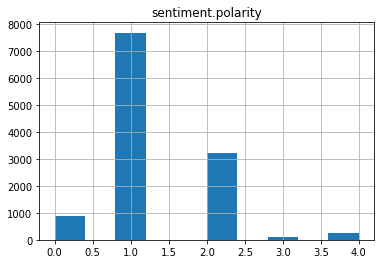

In [7]:
train_data.hist('sentiment.polarity')

In [8]:
validation_data['sentiment.polarity']= label_encoder.fit_transform(validation_data['sentiment.polarity'])
validation_data

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,hearthstone,"The Hearthstone Saloon, my 2015 Blizzard Stude...",t3_2somy1,https://www.reddit.com/r/hearthstone/comments/...,Seradin,http://imgur.com/a/qmVd2\n\nThis is my entry f...,announcement,True,0,,4,1.000000
1,hearthstone,"The Hearthstone Saloon, my 2015 Blizzard Stude...",t1_cnrnkw7,https://www.reddit.com/r/hearthstone/comments/...,_ae_,Cool stuff.\n\nOnly thing that stood out to me...,elaboration,False,1,t3_2somy1,1,0.550000
2,hearthstone,"The Hearthstone Saloon, my 2015 Blizzard Stude...",t1_cnrjdx5,https://www.reddit.com/r/hearthstone/comments/...,Jrod22too,Kinda awesome. What did you do it in?,question,False,1,t3_2somy1,4,1.000000
3,hearthstone,"The Hearthstone Saloon, my 2015 Blizzard Stude...",t1_cnrk704,https://www.reddit.com/r/hearthstone/comments/...,Seradin,"I used Maya, 3DCoat, Photoshop, and Unreal!",answer,False,2,t1_cnrjdx5,1,0.000000
4,hearthstone,"The Hearthstone Saloon, my 2015 Blizzard Stude...",t1_cnru9mr,https://www.reddit.com/r/hearthstone/comments/...,Jrod22too,Awesome job.,appreciation,False,3,t1_cnrk704,4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3104,leagueoflegends,AS/AP Varus,t3_1gg8uz,https://www.reddit.com/r/leagueoflegends/comme...,elli122,is broken!\n\nhere is my build: i start with a...,other,True,0,,1,0.663824
3105,leagueoflegends,AS/AP Varus,t1_cajx81a,https://www.reddit.com/r/leagueoflegends/comme...,synetex,>his ultimate also scales with 100%\n\nyou hav...,elaboration,False,1,t3_1gg8uz,1,1.000000
3106,leagueoflegends,AS/AP Varus,t1_cajxb3y,https://www.reddit.com/r/leagueoflegends/comme...,Mclvor,ez for every pro player :),,False,2,t1_cajx81a,2,1.000000
3107,leagueoflegends,AS/AP Varus,t1_cajxkic,https://www.reddit.com/r/leagueoflegends/comme...,qwertypus,"ill try this build, i usually run way more ap ...",,False,1,t3_1gg8uz,1,0.454167


In [9]:
test_data['sentiment.polarity']= label_encoder.fit_transform(test_data['sentiment.polarity'])
test_data

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,starcraft,Just a reminder on how much SC2 has evolved th...,t3_mqxoi,https://www.reddit.com/r/starcraft/comments/mq...,MeisterKarl,Was watching a VOD from last years DreamHack W...,question,True,0,,1,0.350000
1,starcraft,Just a reminder on how much SC2 has evolved th...,t1_c334scx,https://www.reddit.com/r/starcraft/comments/mq...,smsy,I find it cool that both Mana and Naama made i...,answer,False,1,t3_mqxoi,2,0.650000
2,starcraft,Just a reminder on how much SC2 has evolved th...,t1_c3354ny,https://www.reddit.com/r/starcraft/comments/mq...,vehemus,"Even better, watch a VOD from [MLG Raleigh](ht...",agreement,False,1,t3_mqxoi,1,0.800000
3,starcraft,Just a reminder on how much SC2 has evolved th...,t1_c3356y6,https://www.reddit.com/r/starcraft/comments/mq...,NruJaC,Wasn't that also an epic and awesome series? I...,,False,1,t3_mqxoi,4,0.566667
4,whowouldwin,Your Favorite Hero Now Has A Healing Factor As...,t3_2ltpbr,https://www.reddit.com/r/whowouldwin/comments/...,,Basically what the title says.,question,True,0,,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4011,askreddit,Your favorite subreddit is a superhero. What a...,t1_d1cp4jn,https://www.reddit.com/r/AskReddit/comments/4b...,orey87,"He is ""Super GayCumSlut"". His powers are ""Buka...",answer,False,1,t3_4bv3qd,2,0.666667
4012,askreddit,Your favorite subreddit is a superhero. What a...,t1_d1cpn1b,https://www.reddit.com/r/AskReddit/comments/4b...,AlexanderDivine,Do I want to know which sub?,question,False,2,t1_d1cp4jn,1,0.000000
4013,askreddit,Your favorite subreddit is a superhero. What a...,t1_d1cp5b5,https://www.reddit.com/r/AskReddit/comments/4b...,AskThePsycho,Atheism\nPower - Logic\nArch-nemesis - Bible Belt,answer,False,1,t3_4bv3qd,1,0.000000
4014,askreddit,Your favorite subreddit is a superhero. What a...,t1_d1cppac,https://www.reddit.com/r/AskReddit/comments/4b...,AlexanderDivine,Bible Belt? No spinoff stories where mighty At...,question,False,2,t1_d1cp5b5,2,0.900000


In [10]:
import spacy

# Load the medium english model. 
# We will use this model to get embedding features for tokens later.
#!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

#Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

In [12]:
train_labels = train_data['sentiment.polarity']
validation_labels = validation_data['sentiment.polarity']
test_labels = test_data['sentiment.polarity']

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_vectorizer = TfidfVectorizer()

train_features_tf_idf = ngram_vectorizer.fit_transform(train_data['body'])
test_features_tf_idf = ngram_vectorizer.transform(test_data['body'])
validation_features_tf_idf = ngram_vectorizer.transform(validation_data['body'])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a one-hot encoding vectorizer.
one_hot_vectorizer = CountVectorizer(tokenizer= tokenize_normalize, binary=True)

train_features = one_hot_vectorizer.fit_transform(train_data['body'])
validation_features = one_hot_vectorizer.transform(validation_data['body'])
test_features = one_hot_vectorizer.transform(test_data['body'])

/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [16]:
import collections
label_counts = collections.Counter(test_data['sentiment.polarity'])
for label in label_counts:
  print ("class: " + str(label))
  print (label_counts[label] / len(test_data))

class: 1
0.625996015936255
class: 2
0.274402390438247
class: 4
0.02141434262948207
class: 0
0.07021912350597609
class: 3
0.00796812749003984


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

dict = {}
def evaluation_summary(description, predictions, true_labels):
  list = []
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  weighted_f1 = fbeta_score(predictions, true_labels, 1, average = 'weighted') 
  

  list.append('%.3f'%(precision))
  list.append('%.3f'%(recall))
  list.append('%.3f'%(accuracy))
  list.append('%.3f'%(f1))
  list.append('%.3f'%(weighted_f1))

  dict[description] = list

  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall, f1))
  print(classification_report(predictions, true_labels, digits=3, zero_division = 0))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) 

In [28]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='saga', max_iter = 1000)
logistic_model = logistic.fit(train_features, train_labels)
accuracy_score_logiReg = accuracy_score(logistic_model.predict(test_features), test_labels)
print(accuracy_score_logiReg)

0.7467629482071713


In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_features, train_labels)
print(decision_tree.score(test_features, test_labels))

0.6837649402390438


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [31]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),                 
              ('tfid', TfidfVectorizer()),
              ('logreg', LogisticRegression(solver='saga', max_iter=9000))
              ])
prediction_pipeline.fit(train_data, train_labels)
accuracy_score = accuracy_score(prediction_pipeline.predict(validation_data), validation_labels) 

In [32]:
print(accuracy_score)

0.7307816018012222


In [36]:
from sklearn.model_selection import GridSearchCV
params = {
   'tfid__max_features': (10,100,1000,10000,20000),}

grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='accuracy', cv=2)
grid_search.fit(train_data, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best score: 0.725
Best parameters set:
	tfid__max_features: 1000
